## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing the dataset

In [4]:
IMDB_Data=pd.read_csv(r"C:\Users\shell\Downloads\Mine projects\Python\Project-1\imdb_kaggle.csv")
IMDB_Data.head()

,rank,year,duration,age_limit,rating,numberof_ratings,Metascore,description,name
0,1,1994,2h 22m,15,9.3,(2.9M),82.0,"Over the course of several years, two convicts...",The Shawshank Redemption
1,2,1972,2h 55m,15,9.2,(2M),100.0,The aging patriarch of an organized crime dyna...,The Godfather
2,3,2008,2h 32m,12A,9.0,(2.9M),84.0,When the menace known as the Joker wreaks havo...,The Dark Knight
3,4,2003,3h 21m,12A,9.0,(2M),94.0,Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King
4,5,1993,3h 15m,15,9.0,(1.5M),95.0,"In German-occupied Poland during World War II,...",Schindler's List


# structure of the dataset

In [91]:
IMDB_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   year              1000 non-null   int64  
 2   duration          1000 non-null   object 
 3   age_limit         997 non-null    object 
 4   rating            1000 non-null   float64
 5   numberof_ratings  1000 non-null   object 
 6   Metascore         842 non-null    float64
 7   description       1000 non-null   object 
 8   name              1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


## Counting null values in each column

In [92]:
IMDB_Data.isnull().sum()

rank                  0
year                  0
duration              0
age_limit             3
rating                0
numberof_ratings      0
Metascore           158
description           0
name                  0
dtype: int64

## Removing null values

In [93]:
IMDB_Data=IMDB_Data.dropna()

## Counting duplicate rows

In [5]:
IMDB_Data.duplicated().sum()

np.int64(0)

## removing duplicate rows if any

In [6]:
IMDB_Data.drop_duplicates(inplace=True)

## Setting plot style

In [9]:
sns.set_style('ticks')

In [10]:
IMDB_movies_by_year=IMDB_Data['year'].value_counts().sort_index()

In [11]:
IMDB_movies_by_year

year
1920     1
1921     1
1922     1
1924     1
1925     2
        ..
2020     9
2021    11
2022    18
2023    17
2024     2
Name: count, Length: 103, dtype: int64

### plotting a barchart which shows how many movies a released in each year

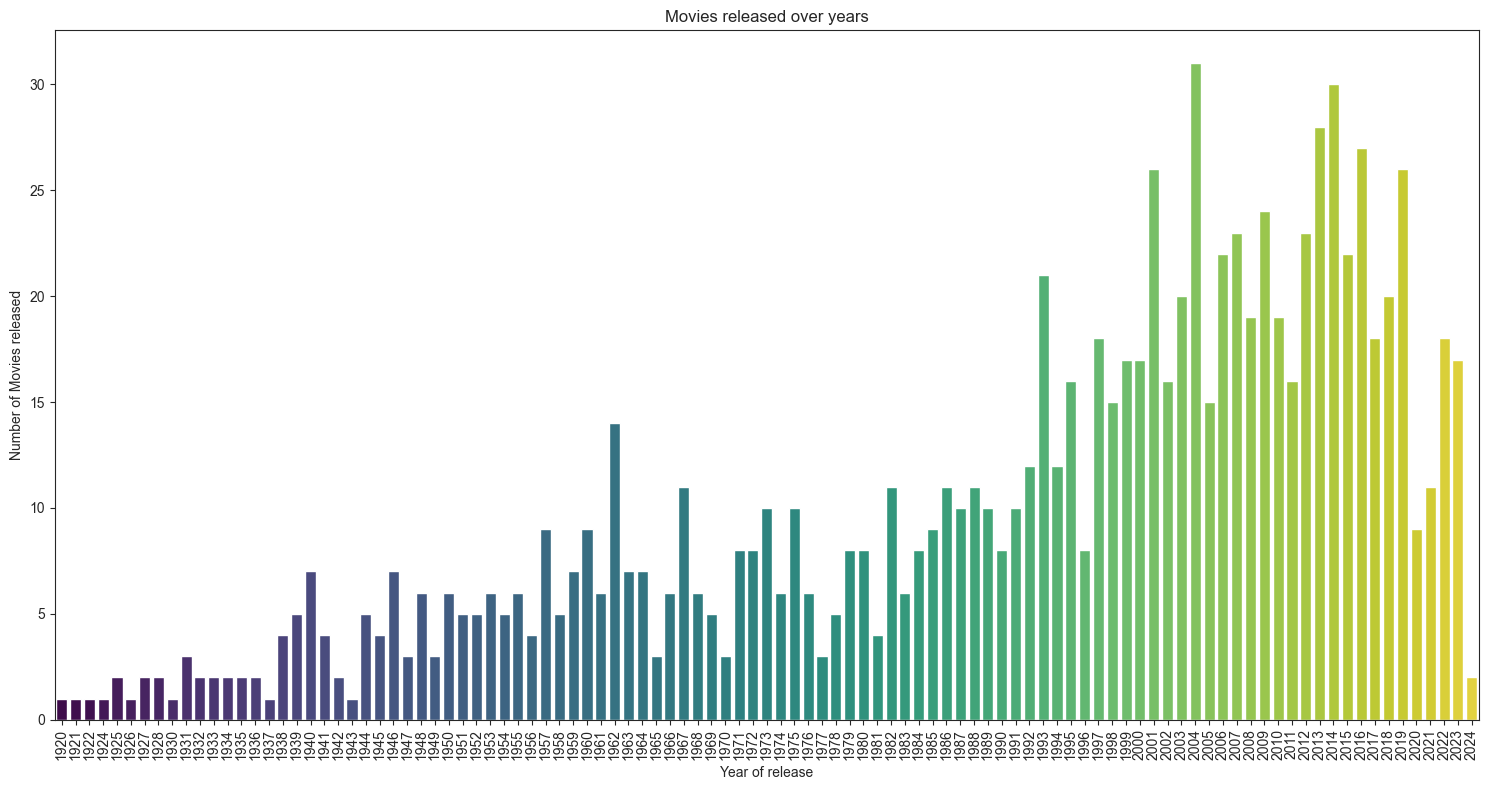

In [12]:
plt.figure(figsize=(15, 8))
sns.barplot(x=IMDB_movies_by_year.index, y=IMDB_movies_by_year.values, hue=IMDB_movies_by_year.index, legend=False,  palette='viridis')
plt.title('Movies released over years')
plt.xlabel('Year of release')
plt.ylabel('Number of Movies released')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The graph clearly illustrates an upward trend in the number of movie releases over the years. In 1939, the count was approximately five films. This figure nearly doubled by 1962. By 1993, the average number of movies released annually had increased to around 15. Notably, there were significant surges in 2004 and 2014. However, following 2014, there has been a noticeable decline in the number of movie releases.

#### what are the minimum and maximum rating movies received on IMDB

In [13]:
print(min(IMDB_Data['rating']), max(IMDB_Data['rating']))

7.6 9.3


#### creating bins for categorical analysis of movies based on ratings

In [14]:
bins=np.round(np.linspace(min(IMDB_Data['rating']), max(IMDB_Data['rating']),5),decimals=2)

In [15]:
bins

array([7.6 , 8.02, 8.45, 8.88, 9.3 ])

In [16]:
group_names=['7.6-8.02','8.02-8.45','8.45-8.88','8.88-9.3']

In [17]:
IMDB_Data['rating_bins']=pd.cut(IMDB_Data['rating'],bins,labels=group_names, include_lowest=True)

In [19]:
IMDB_Data.head()

,rank,year,duration,age_limit,rating,numberof_ratings,Metascore,description,name,rating_bins
0,1,1994,2h 22m,15,9.3,(2.9M),82.0,"Over the course of several years, two convicts...",The Shawshank Redemption,8.88-9.3
1,2,1972,2h 55m,15,9.2,(2M),100.0,The aging patriarch of an organized crime dyna...,The Godfather,8.88-9.3
2,3,2008,2h 32m,12A,9.0,(2.9M),84.0,When the menace known as the Joker wreaks havo...,The Dark Knight,8.88-9.3
3,4,2003,3h 21m,12A,9.0,(2M),94.0,Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King,8.88-9.3
4,5,1993,3h 15m,15,9.0,(1.5M),95.0,"In German-occupied Poland during World War II,...",Schindler's List,8.88-9.3


In [20]:
movies_ratingwise_distribution=IMDB_Data['rating_bins'].value_counts().reset_index()

In [21]:
movies_ratingwise_distribution

,rating_bins,count
0,7.6-8.02,655
1,8.02-8.45,282
2,8.45-8.88,53
3,8.88-9.3,10


### plotting how many movies are there in each category of ratings

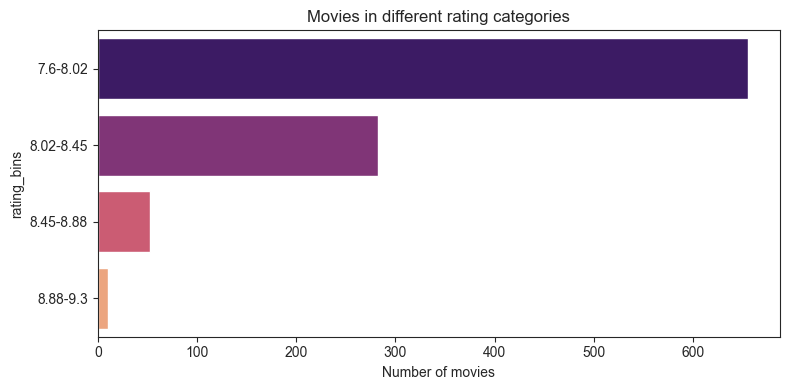

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(x='count', y='rating_bins', hue='rating_bins',legend=False, data=movies_ratingwise_distribution, palette="magma")
plt.title('Movies in different rating categories')
plt.xlabel('Number of movies')
plt.ylabel('rating_bins')
plt.tight_layout()
plt.show()

#### Splitting duration column so to create duration column where data is in minutes

In [24]:
IMDB_Data[['duration_hr','duration_min']]=IMDB_Data['duration'].str.rsplit(' ',expand=True)

In [25]:
IMDB_Data.head()

,rank,year,duration,age_limit,rating,numberof_ratings,Metascore,description,name,rating_bins,duration_hr,duration_min
0,1,1994,2h 22m,15,9.3,(2.9M),82.0,"Over the course of several years, two convicts...",The Shawshank Redemption,8.88-9.3,2h,22m
1,2,1972,2h 55m,15,9.2,(2M),100.0,The aging patriarch of an organized crime dyna...,The Godfather,8.88-9.3,2h,55m
2,3,2008,2h 32m,12A,9.0,(2.9M),84.0,When the menace known as the Joker wreaks havo...,The Dark Knight,8.88-9.3,2h,32m
3,4,2003,3h 21m,12A,9.0,(2M),94.0,Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King,8.88-9.3,3h,21m
4,5,1993,3h 15m,15,9.0,(1.5M),95.0,"In German-occupied Poland during World War II,...",Schindler's List,8.88-9.3,3h,15m


##### splitting hr column based on numeric and alphabets

In [26]:
IMDB_Data['hr']=pd.DataFrame(zip(*list(IMDB_Data['duration_hr']))).transpose().loc[:,0]

In [27]:
IMDB_Data.head()

,rank,year,duration,age_limit,rating,numberof_ratings,Metascore,description,name,rating_bins,duration_hr,duration_min,hr
0,1,1994,2h 22m,15,9.3,(2.9M),82.0,"Over the course of several years, two convicts...",The Shawshank Redemption,8.88-9.3,2h,22m,2
1,2,1972,2h 55m,15,9.2,(2M),100.0,The aging patriarch of an organized crime dyna...,The Godfather,8.88-9.3,2h,55m,2
2,3,2008,2h 32m,12A,9.0,(2.9M),84.0,When the menace known as the Joker wreaks havo...,The Dark Knight,8.88-9.3,2h,32m,2
3,4,2003,3h 21m,12A,9.0,(2M),94.0,Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King,8.88-9.3,3h,21m,3
4,5,1993,3h 15m,15,9.0,(1.5M),95.0,"In German-occupied Poland during World War II,...",Schindler's List,8.88-9.3,3h,15m,3


##### setting display window to show maximum rows

In [28]:
pd.set_option('display.max.rows',1000)

#### filling None values with 0m in minute column

In [29]:
IMDB_Data['duration_min']=IMDB_Data['duration_min'].fillna('0m')

In [30]:
IMDB_Data['duration_min']

0      22m
1      55m
2      32m
3      21m
4      15m
5      36m
6      22m
7      58m
8      34m
9      27m
10     28m
11     19m
12     22m
13     59m
14     28m
15     49m
16     16m
17     25m
18     13m
19      4m
20     44m
21     33m
22     44m
23     37m
24     46m
25      9m
26     49m
27      7m
28     20m
29     58m
30      1m
31     17m
32      5m
33     10m
34     56m
35     27m
36     10m
37     13m
38     50m
39      2m
40     35m
41     56m
42     57m
43     12m
44     31m
45     45m
46     49m
47     10m
48     28m
49     46m
50     46m
51     59m
52     30m
53     52m
54     42m
55     46m
56     52m
57     29m
58     54m
59     27m
60     27m
61     43m
62     38m
63     33m
64     27m
65      1m
66     17m
67      2m
68     44m
69     26m
70     29m
71     22m
72     40m
73     53m
74     50m
75     45m
76     55m
77     38m
78     57m
79     46m
80     50m
81     17m
82      6m
83     29m
84     28m
85     56m
86      5m
87     23m
88     44m
89     25m
90     21m

##### converting this data into list for splitting column

In [31]:
list1=list(IMDB_Data['duration_min'])

In [33]:
# Splitting the elements into numeric and alphabetic components
split_data = [(int(''.join(filter(str.isdigit, item))), ''.join(filter(str.isalpha, item))) for item in list1]

# Creating the DataFrame
df = pd.DataFrame(split_data, columns=['Numeric', 'Alphabet'])

print(df)

     Numeric Alphabet
0         22        m
1         55        m
2         32        m
3         21        m
4         15        m
5         36        m
6         22        m
7         58        m
8         34        m
9         27        m
10        28        m
11        19        m
12        22        m
13        59        m
14        28        m
15        49        m
16        16        m
17        25        m
18        13        m
19         4        m
20        44        m
21        33        m
22        44        m
23        37        m
24        46        m
25         9        m
26        49        m
27         7        m
28        20        m
29        58        m
30         1        m
31        17        m
32         5        m
33        10        m
34        56        m
35        27        m
36        10        m
37        13        m
38        50        m
39         2        m
40        35        m
41        56        m
42        57        m
43        12        m
44        

#### creating new column called mins

In [35]:
IMDB_Data['mins']=df['Numeric']

In [36]:
IMDB_Data.dtypes

rank                   int64
year                   int64
duration              object
age_limit             object
rating               float64
numberof_ratings      object
Metascore            float64
description           object
name                  object
rating_bins         category
duration_hr           object
duration_min          object
hr                    object
mins                   int64
dtype: object

In [37]:
IMDB_Data['Total Duration (mins)']=IMDB_Data['hr'].astype('float')*60+IMDB_Data['mins']

In [38]:
IMDB_Data.head()

,rank,year,duration,age_limit,rating,numberof_ratings,Metascore,description,name,rating_bins,duration_hr,duration_min,hr,mins,Total Duration (mins)
0,1,1994,2h 22m,15,9.3,(2.9M),82.0,"Over the course of several years, two convicts...",The Shawshank Redemption,8.88-9.3,2h,22m,2,22,142.0
1,2,1972,2h 55m,15,9.2,(2M),100.0,The aging patriarch of an organized crime dyna...,The Godfather,8.88-9.3,2h,55m,2,55,175.0
2,3,2008,2h 32m,12A,9.0,(2.9M),84.0,When the menace known as the Joker wreaks havo...,The Dark Knight,8.88-9.3,2h,32m,2,32,152.0
3,4,2003,3h 21m,12A,9.0,(2M),94.0,Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King,8.88-9.3,3h,21m,3,21,201.0
4,5,1993,3h 15m,15,9.0,(1.5M),95.0,"In German-occupied Poland during World War II,...",Schindler's List,8.88-9.3,3h,15m,3,15,195.0


#### dropping unnecessary columns

In [39]:
IMDB_Data.drop(columns=['duration_hr','duration_min'], inplace=True)

In [40]:
IMDB_Data.head()

,rank,year,duration,age_limit,rating,numberof_ratings,Metascore,description,name,rating_bins,hr,mins,Total Duration (mins)
0,1,1994,2h 22m,15,9.3,(2.9M),82.0,"Over the course of several years, two convicts...",The Shawshank Redemption,8.88-9.3,2,22,142.0
1,2,1972,2h 55m,15,9.2,(2M),100.0,The aging patriarch of an organized crime dyna...,The Godfather,8.88-9.3,2,55,175.0
2,3,2008,2h 32m,12A,9.0,(2.9M),84.0,When the menace known as the Joker wreaks havo...,The Dark Knight,8.88-9.3,2,32,152.0
3,4,2003,3h 21m,12A,9.0,(2M),94.0,Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King,8.88-9.3,3,21,201.0
4,5,1993,3h 15m,15,9.0,(1.5M),95.0,"In German-occupied Poland during World War II,...",Schindler's List,8.88-9.3,3,15,195.0


In [41]:
print(min(IMDB_Data['Total Duration (mins)']),max(IMDB_Data['Total Duration (mins)']))

64.0 321.0


In [42]:
x=np.round(IMDB_Data['Total Duration (mins)'].mean(),decimals=2)
x

np.float64(125.19)

### Plotting total duration VS count of movies

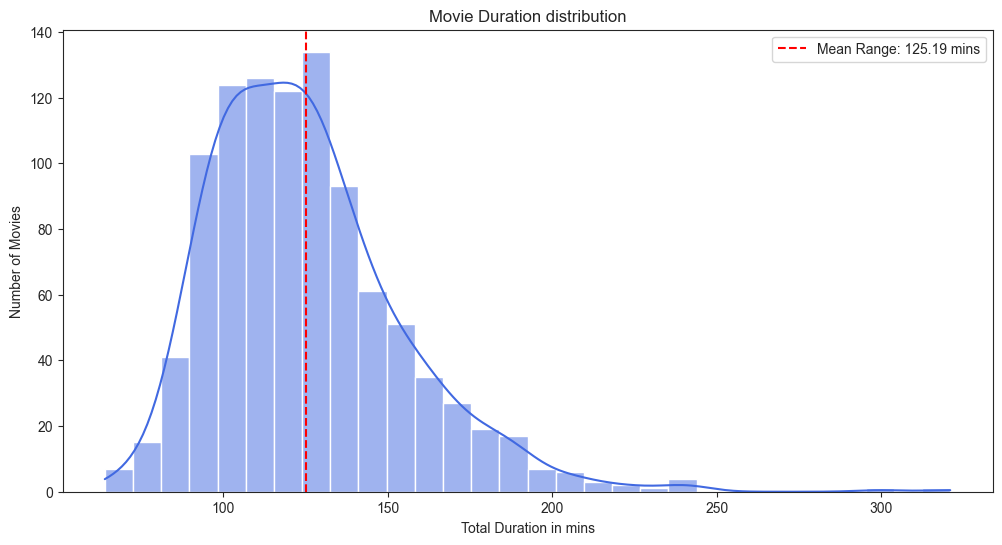

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(IMDB_Data['Total Duration (mins)'], bins=30, kde=True, color='royalblue')
plt.title('Movie Duration distribution')
plt.xlabel('Total Duration in mins')
plt.ylabel('Number of Movies')
plt.axvline(IMDB_Data['Total Duration (mins)'].mean(), color='red', linestyle='--', label=f'Mean Range: {x} mins')
plt.legend()
plt.show()

#### Average ratings of movies each year

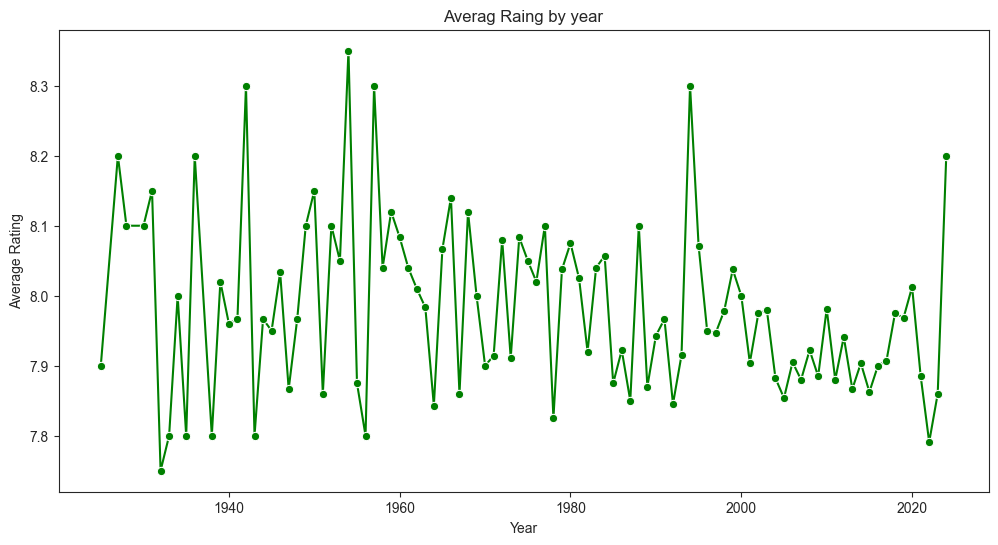

In [206]:
average_range_by_year = IMDB_Data.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rating', data=average_range_by_year, marker='o', color='green')
plt.title('Averag Raing by year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

#### Plotting Age_limit VS count of movies

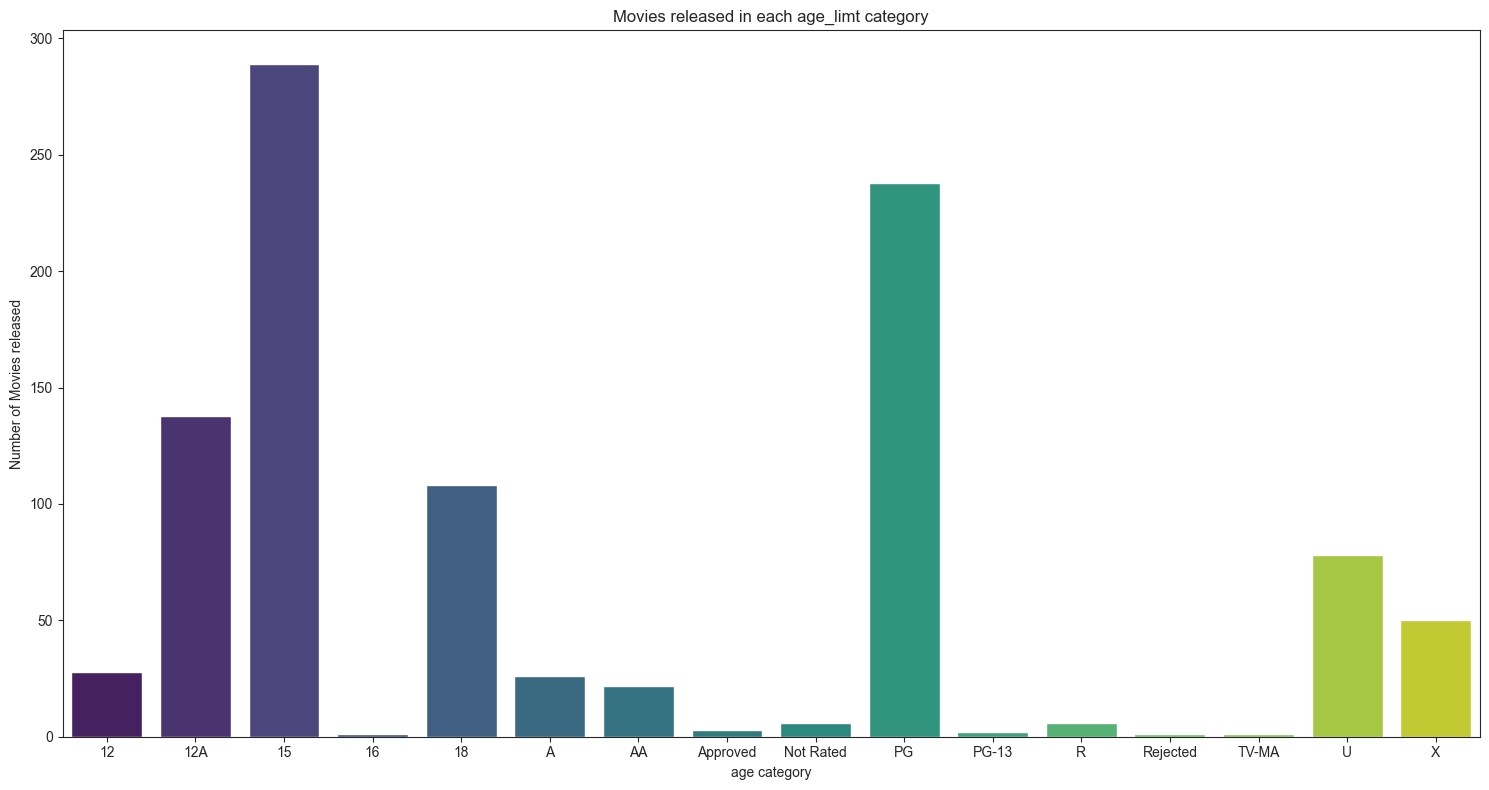

In [47]:
dummy_df=IMDB_Data['age_limit'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
sns.barplot(x=dummy_df.index, y=dummy_df.values, hue=dummy_df.index, legend=False,  palette='viridis')
plt.title('Movies released in each age_limt category')
plt.xlabel('age category')
plt.ylabel('Number of Movies released')
plt.tight_layout()
plt.show()

As can be seen by graph maximum movies which are released are in 15 & PG (Parental Guidance) category.